In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


engine = create_engine('sqlite:///sncf_table.sqlite')
connexion = engine.connect()

# Partie 3
### Question 1

In [4]:
df = pd.read_csv("merge_final.csv")
df.head(10)

,Unnamed: 0,temperature_moyenne,nb_lost_item
0,0,-9.3500,8
1,1,-8.0750,1
2,2,-8.0000,4
3,3,-7.9625,6
4,4,-7.8000,8
5,5,-7.2375,9
6,6,-7.2000,9
7,7,-6.8750,5
8,8,-6.4625,10
9,9,-6.4625,3


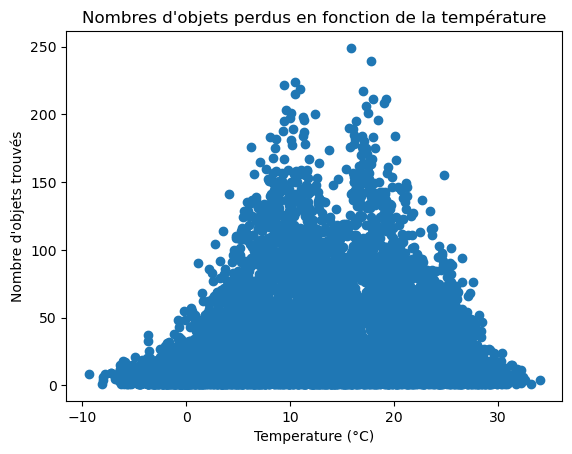

In [5]:
plt.scatter(df['temperature_moyenne'], df['nb_lost_item'])
plt.title("Nombres d'objets perdus en fonction de la température")
plt.xlabel('Temperature (°C)')
plt.ylabel("Nombre d'objets trouvés")
plt.show()

In [6]:
corr = df['temperature_moyenne'].corr(df['nb_lost_item'])
corr

0.07759374681026783

### Question 2

In [7]:
stmt = "SELECT id,date FROM Lost_Item"
df_res = pd.read_sql(stmt, connexion, parse_dates=True)
df_res['date'] = pd.to_datetime(df_res ['date'])
df_res_per_saison = df_res.groupby(pd.Grouper(key='date', freq='Q'))['id'].count().reset_index().rename(columns={'date' : 'trimestre', 'id':'count'})
df_res_per_saison

,trimestre,count
0,2016-03-31 00:00:00+00:00,21869
1,2016-06-30 00:00:00+00:00,23245
2,2016-09-30 00:00:00+00:00,26454
3,2016-12-31 00:00:00+00:00,23977
4,2017-03-31 00:00:00+00:00,22869
5,2017-06-30 00:00:00+00:00,24662
6,2017-09-30 00:00:00+00:00,26307
7,2017-12-31 00:00:00+00:00,24078
8,2018-03-31 00:00:00+00:00,22540
9,2018-06-30 00:00:00+00:00,18465


In [8]:
def f(trimestre):
    if trimestre.strftime('%m') == '03':
        saison = 'Printemps'
    elif trimestre.strftime('%m') == '06':
        saison = 'Eté'
    elif trimestre.strftime('%m') == '09':
        saison = 'Automne'
    elif trimestre.strftime('%m') == '12':
        saison = 'Hiver'
    return saison

In [12]:
df_res_per_saison['saison'] = df_res_per_saison['trimestre'].apply(lambda x : f(x))
df_saison = df_res_per_saison.groupby('saison').median().reset_index()
df_saison

/tmp/ipykernel_394141/2710586668.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_saison = df_res_per_saison.groupby('saison').median().reset_index()


,saison,count
0,Automne,25241.5
1,Eté,20855.0
2,Hiver,21057.5
3,Printemps,21748.5


### Question 3

KeyError: 'Column not found: id'

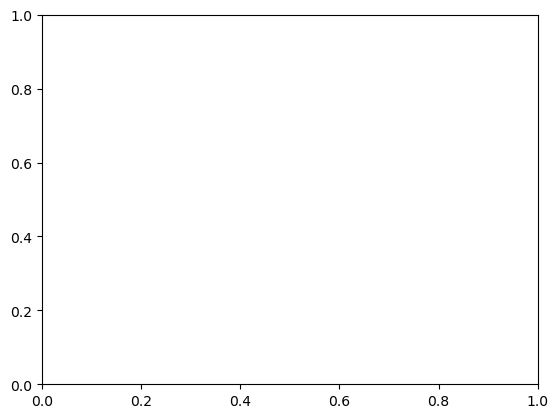

In [20]:
df_saison.boxplot('id', by='saison', grid=False)
plt.title( "Nombre d'objet perdu par saison" )
plt.ylabel("nombre d'objet perdu")
plt.xlabel('saison')

In [17]:
corr = df_res_per_saison['saison'].corr(df_res_per_saison['count'])
corr

TypeError: unsupported operand type(s) for /: 'str' and 'int'